In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('/content/archive (3).zip')


In [ ]:
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Sales First Difference
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32,NaN
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16,-16.0
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27,11.0
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29,2.0
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17,-12.0


In [ ]:
## Cleaning up the data
df.rename(columns={'Product_Category':' Category', 'Customer_segment': 'Segment', 'Marketing_Spend': 'Marketing','Units_Sold' :' Sales'})


,Date,Category,Price,Discount,Customer_Segment,Marketing,Sales
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26


In [ ]:
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [ ]:
df.tail()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26
999,26-09-2025,Home Decor,93.94,29.68,Regular,4258.11,39


In [ ]:
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


VISUALIZING THE DATA

<Axes: >

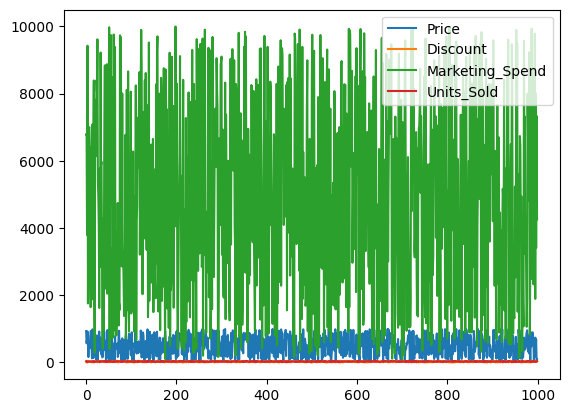

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Units_Sold'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Units_Sold):
    result=adfuller(Units_Sold)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:

adfuller_test(df['Units_Sold'])

ADF Test Statistic : -32.31841834191273
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 999
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Auto Regressive Model

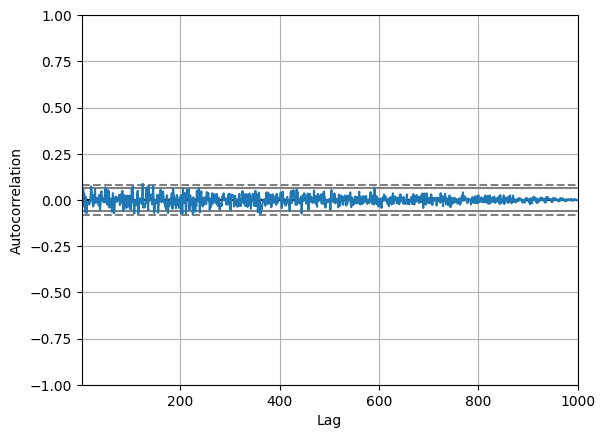

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Units_Sold'])
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

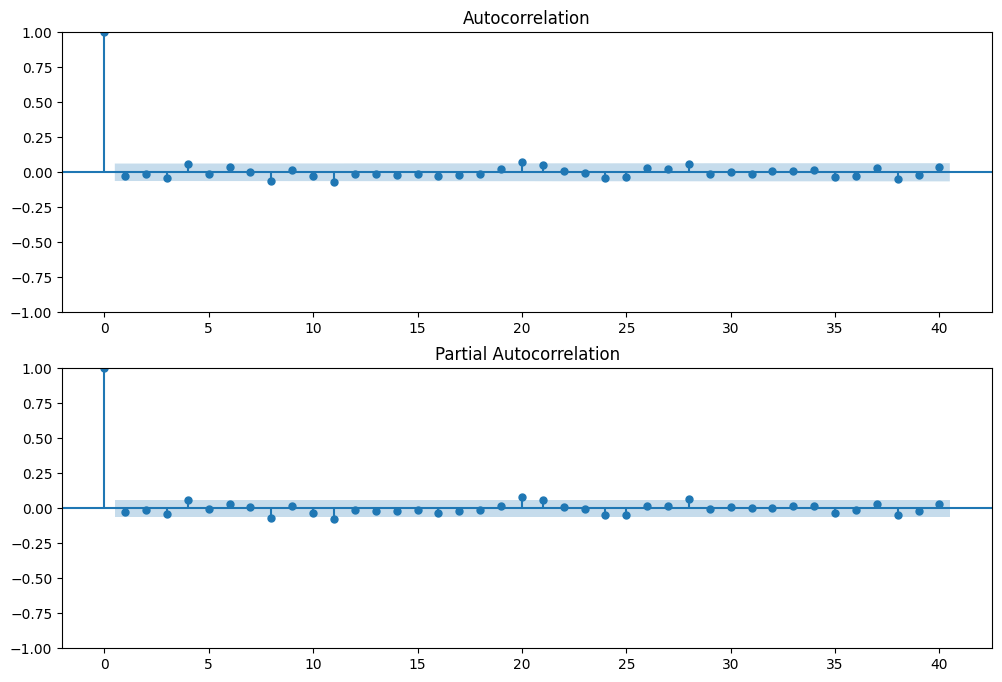

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Units_Sold'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Units_Sold'].iloc[13:],lags=40,ax=ax2)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(df['Units_Sold'], order=(1,0,0))
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Units_Sold   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3401.630
Date:                Thu, 26 Dec 2024   AIC                           6809.259
Time:                        14:52:48   BIC                           6823.983
Sample:                             0   HQIC                          6814.855
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6308      0.226    131.327      0.000      29.189      30.073
ar.L1         -0.0240      0.031     -0.772      0.440      -0.085       0.037
sigma2        52.7403      2.405     21.932      0.000      48.027      57.454
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.99   Prob(JB):                         0.26
Heteroskedasticity (H):               0.96   Skew:                             0.12
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
model=sm.tsa.statespace.SARIMAX(df['Units_Sold'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: >

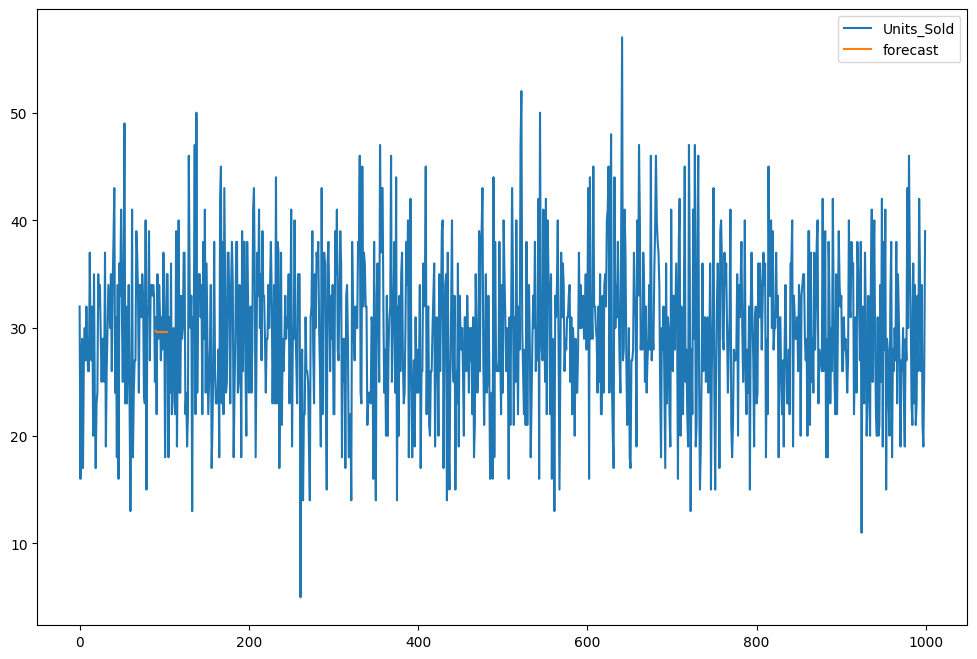

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Units_Sold','forecast']].plot(figsize=(12,8))

In [15]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [16]:
future_datest_df.tail()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,forecast
2104-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2104-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2105-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2105-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2105-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
future_df=pd.concat([df,future_datest_df])

<ipython-input-17-4cc8c9eff41a>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

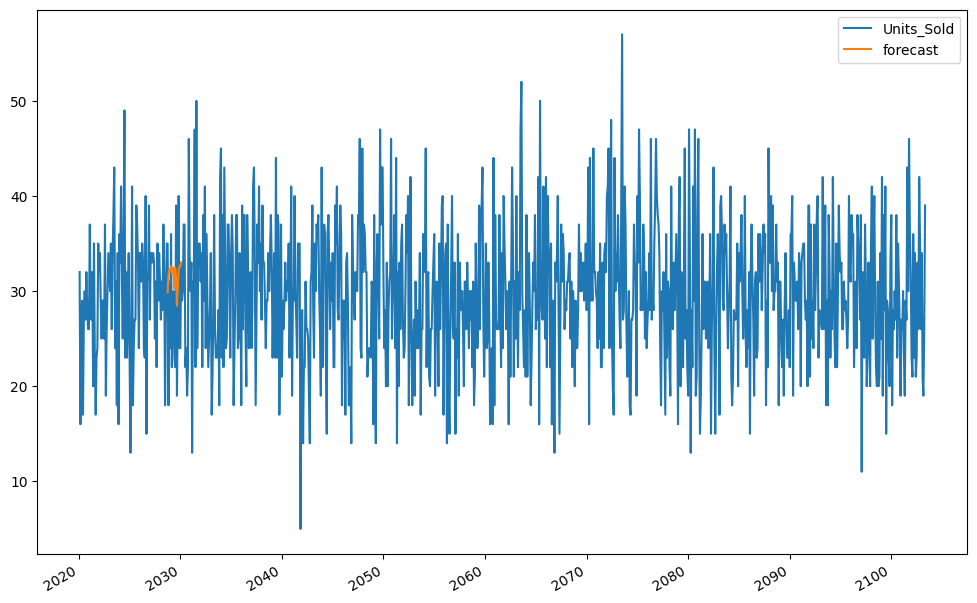

In [22]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Units_Sold', 'forecast']].plot(figsize=(12, 8))